<a href="https://colab.research.google.com/github/ananyarao23/Image-Segmentation-DRINet/blob/main/base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd gdrive/MyDrive/CS736\ Project


/content/gdrive/MyDrive/CS736 Project


In [ ]:
!wget https://ndownloader.figshare.com/articles/1512427/versions/5


--2024-04-11 07:39:20--  https://ndownloader.figshare.com/articles/1512427/versions/5
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 99.81.90.52, 54.155.171.60, 54.73.81.232, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|99.81.90.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879501695 (839M) [application/zip]
Saving to: ‘5’

5                   100%[===================>] 838.76M  24.3MB/s    in 34s     

2024-04-11 07:39:54 (24.7 MB/s) - ‘5’ saved [879501695/879501695]



In [ ]:
!unzip 5


Archive:  5
 extracting: brainTumorDataPublic_1-766.zip  
 extracting: brainTumorDataPublic_1533-2298.zip  
 extracting: brainTumorDataPublic_767-1532.zip  
 extracting: brainTumorDataPublic_2299-3064.zip  
 extracting: cvind.mat               
 extracting: README.txt              


In [ ]:
!rm 5

In [ ]:
!cat brainTumorDataPublic_* > brainTumorDataPublic_temp.zip
!zip -FF brainTumorDataPublic_temp.zip --out data.zip

Fix archive (-FF) - salvage what can
 Found end record (EOCDR) - says expect single disk archive
Scanning for entries...
 copying: 1533.mat  (339637 bytes)
 copying: 1534.mat  (340418 bytes)
 copying: 1535.mat  (342222 bytes)
 copying: 1536.mat  (342920 bytes)
 copying: 1537.mat  (343484 bytes)
 copying: 1538.mat  (323526 bytes)
 copying: 1539.mat  (326770 bytes)
 copying: 1540.mat  (328641 bytes)
 copying: 1541.mat  (331088 bytes)
 copying: 1542.mat  (333075 bytes)
 copying: 1543.mat  (335548 bytes)
 copying: 1544.mat  (337196 bytes)
 copying: 1545.mat  (265792 bytes)
 copying: 1546.mat  (266357 bytes)
 copying: 1547.mat  (267792 bytes)
 copying: 1548.mat  (269198 bytes)
 copying: 1549.mat  (267728 bytes)
 copying: 1550.mat  (265932 bytes)
 copying: 1551.mat  (264956 bytes)
 copying: 1552.mat  (262235 bytes)
 copying: 1553.mat  (262966 bytes)
 copying: 1554.mat  (263969 bytes)
 copying: 1555.mat  (264622 bytes)
 copying: 1556.mat  (264585 bytes)
 copying: 1557.mat  (347465 bytes)
 cop

In [ ]:
!rm brainTumorDataPublic_*

In [ ]:
!unzip data.zip -d data

Archive:  data.zip
  inflating: data/1533.mat           
  inflating: data/1534.mat           
  inflating: data/1535.mat           
  inflating: data/1536.mat           
  inflating: data/1537.mat           
  inflating: data/1538.mat           
  inflating: data/1539.mat           
  inflating: data/1540.mat           
  inflating: data/1541.mat           
  inflating: data/1542.mat           
  inflating: data/1543.mat           
  inflating: data/1544.mat           
  inflating: data/1545.mat           
  inflating: data/1546.mat           
  inflating: data/1547.mat           
  inflating: data/1548.mat           
  inflating: data/1549.mat           
  inflating: data/1550.mat           
  inflating: data/1551.mat           
  inflating: data/1552.mat           
  inflating: data/1553.mat           
  inflating: data/1554.mat           
  inflating: data/1555.mat           
  inflating: data/1556.mat           
  inflating: data/1557.mat           
  inflating: data/1558.mat     

In [ ]:
!ls data

1000.mat  1278.mat  1554.mat  1830.mat	2106.mat  2383.mat  265.mat   2936.mat	453.mat  72.mat
1001.mat  1279.mat  1555.mat  1831.mat	2107.mat  2384.mat  2660.mat  2937.mat	454.mat  730.mat
1002.mat  127.mat   1556.mat  1832.mat	2108.mat  2385.mat  2661.mat  2938.mat	455.mat  731.mat
1003.mat  1280.mat  1557.mat  1833.mat	2109.mat  2386.mat  2662.mat  2939.mat	456.mat  732.mat
1004.mat  1281.mat  1558.mat  1834.mat	210.mat   2387.mat  2663.mat  293.mat	457.mat  733.mat
1005.mat  1282.mat  1559.mat  1835.mat	2110.mat  2388.mat  2664.mat  2940.mat	458.mat  734.mat
1006.mat  1283.mat  155.mat   1836.mat	2111.mat  2389.mat  2665.mat  2941.mat	459.mat  735.mat
1007.mat  1284.mat  1560.mat  1837.mat	2112.mat  238.mat   2666.mat  2942.mat	45.mat	 736.mat
1008.mat  1285.mat  1561.mat  1838.mat	2113.mat  2390.mat  2667.mat  2943.mat	460.mat  737.mat
1009.mat  1286.mat  1562.mat  1839.mat	2114.mat  2391.mat  2668.mat  2944.mat	461.mat  738.mat
100.mat   1287.mat  1563.mat  183.mat	2115.mat  2392.

In [ ]:
!rm data.zip

In [10]:
!pip install hdf5storage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.3 MB/s eta 0:00:00


In [11]:
!pip install mat73

In [12]:
import os
import argparse
import sys
import numpy as np
import hdf5storage
import cv2
import mat73
import matplotlib.pyplot as plt

In [5]:
!ls data > name.txt

ls: cannot access 'data': No such file or directory


In [ ]:
class NoDataFound(Exception):
    pass


def dir_path(path):
    """Check the path and the existence of a data directory"""
    # replace '\' in path for Windows users
    path = path.replace('\', '/')
    data_path = os.path.join(path, 'data').replace('\', '/')

    if os.path.isdir(data_path):
        return path
    elif os.path.isdir(path):
        raise NoDataFound('Could not find a "data" folder inside directory. {} does not exist.'
                          .format(data_path))
    else:
        raise NotADirectoryError(path)

path='/content/gdrive/MyDrive/CS736 Project/'
parser = argparse.ArgumentParser()
parser.add_argument('path', help='path to the brain_tumor_dataset directory', type=dir_path)
parser.add_argument('--image-dimension', '-d', default=512, help='dimension of the image', type=int)
args = parser.parse_args(args=[path])

labels = []
images = []
masks = []

data_dir = os.path.join(args.path, 'data').replace('\', '/')
files = os.listdir(data_dir)
for i, file in enumerate(files, start=1):
    if i % 10 == 0:
        # print the percentage of images loaded
        sys.stdout.write('\r[{}/{}] images loaded: {:.1f} %'
                         .format(i, len(files), i / float(len(files)) * 100))
        sys.stdout.flush()

    # load matlab file with hdf5storage as scipy.io.loadmat does not support v7.3 files
    mat_file = hdf5storage.loadmat(os.path.join(data_dir, file))['cjdata'][0]

    # resize image and mask to a unique size
    image = cv2.resize(mat_file[2], dsize=(args.image_dimension, args.image_dimension),
                       interpolation=cv2.INTER_CUBIC)
    mask = cv2.resize(mat_file[4].astype('uint8'), dsize=(args.image_dimension, args.image_dimension),
                      interpolation=cv2.INTER_CUBIC)

    labels.append(int(mat_file[0]))
    images.append(image)
    masks.append(mask.astype(bool))

sys.stdout.write('\r[{}/{}] images loaded: {:.1f} %'
                 .format(i, len(files), i / float(len(files)) * 100))
sys.stdout.flush()

labels = np.array(labels)
images = np.array(images)
masks = np.array(masks)

print('\nlabels:', labels.shape)
print('images:', images.shape)
print('masks:', masks.shape)

np.save(os.path.join(args.path, 'labels.npy'), labels)
np.save(os.path.join(args.path, 'images.npy'), images)
np.save(os.path.join(args.path, 'masks.npy'), masks)
print('labels.npy, images.npy, masks.npy saved in', args.path)

In [7]:
class_index = {"1":"meningioma",
               "2":"glioma",
               "3":"pituitary tumor"}

In [13]:
images = np.load("images.npy")
labels = np.load("labels.npy")
masks = np.load("masks.npy")

In [10]:
print(images.shape)
print(labels.shape)
print(masks.shape)

(2899, 512, 512)
(2899,)
(2899, 512, 512)


In [99]:
train_data = {"images":images[:200][:],
              "masks":masks[:200][:],
              "labels":labels[:200][:]} #1500 images for training
test_data = {"images":images[200:450][:],
             "masks":masks[200:450][:],
             "labels":labels[200:450][:]} #1000 images for testing
valid_data = {"images":images[2500:][:],
             "masks":masks[2500:][:],
             "labels":labels[2500:][:]} #399 for validation

In [100]:
print(train_data["images"].shape)
print(test_data["labels"].shape)
print(valid_data["masks"].shape)

(200, 512, 512)
(250,)
(399, 512, 512)


In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import skimage.io as io
# import skimage.color as color
import random as r
import math
from keras.losses import BinaryCrossentropy
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose,Layer
from keras.layers import Input, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
from keras import backend as keras
import os
import argparse
import sys
import cv2

In [42]:
##### yha we will have the dense net model

class DC_block_layer(Model):
    def __init__(self,input_size):
        super(DC_block_layer,self).__init__()
        self.h = input_size[0]
        self.b = input_size[1]
        self.conv1 = Conv2D(48,(3,3),padding='same',activation='relu',input_shape=input_size)
        self.conv2 = Conv2D(48,(3,3),padding='same',activation='relu',input_shape=(self.h,self.b,48+input_size[2]))
        self.conv3 = Conv2D(48,(3,3),padding='same',activation='relu',input_shape=(self.h,self.b,96+input_size[2]))

    def call(self,inputs):
        out1 = self.conv1(inputs)
        ### add BN
        cnct1 = tf.keras.layers.Concatenate(axis=-1)([inputs, out1]) ### size = (512,512,12+d)
        out2 = self.conv2(cnct1)
        ### add BN
        cnct2 = tf.keras.layers.Concatenate(axis=-1)([cnct1, out2])  ### size = (512,512,24+d)
        out3 = self.conv3(cnct2)
        ### add BN
        cnct3 = tf.keras.layers.Concatenate(axis=-1)([cnct2, out3])  ### size = (512,512,36+d)

        return cnct3


In [17]:
class RI_block_layer(Model):
    def __init__(self,input_size):
        super(RI_block_layer,self).__init__()
        self.block1 = RI_layer(input_size)
        self.block2 = RI_layer(input_size)
        self.block3 = RI_layer(input_size)

    def call(self,inputs):
        x1 = self.block1(inputs)
        ### BN
        x2 = self.block2(x1)
        ### BN
        x3 = self.block3(x2)
        ### BN

        return x3
        pass

class RI_layer(Layer):
    def __init__(self,input_size):
        ### not sure about the dimensions yet (channels and depth) so using random values abhi
        super(RI_layer,self).__init__()
        self.h = input_size[0]
        self.b = input_size[1]
        self.conv1 = Conv2D(1,(1,1),padding='same',activation='relu',input_shape=input_size) ### depth of input??
        self.conv3 = Conv2D(2,(3,3),padding='same',activation='relu',input_shape=(self.h,self.b))
        self.conv3d = Conv2DTranspose(1,(3,3),dilation_rate=(2,2),padding='same',activation='relu',input_shape=(self.h,self.b))
        self.conv3d_f = Conv2DTranspose(input_size[-1],(3,3),padding='same',activation='relu',input_shape=(self.h,self.b,4))

    def call(self,inputs):
        out1 = self.conv1(inputs)
        out2 = self.conv3(out1)
        out3 = self.conv3d(out1)
        cnct1 = tf.keras.layers.Concatenate(axis=-1)([out1,out2,out3])
        x = self.conv3d_f(cnct1)
        ### perform the element wise fusion, whatever it is
        return x

In [93]:
class Unpooling(Model):
    def __init__(self,input_size):
        super(Unpooling,self).__init__()
        self.h = input_size[0]
        self.b = input_size[1]
        self.conv1 = Conv2DTranspose(2,(1,1),padding='same',activation='relu',input_shape=input_size) ### again not sure about depth
        self.conv3d = Conv2DTranspose(2,(3,3),dilation_rate=(2,2),padding='same',activation='relu',input_shape=(self.h,self.b,2))
        self.conv1_bn = Conv2D(1,(1,1),padding='same',activation='relu',input_shape=(self.h,self.b,2))
        self.upsample = Conv2DTranspose(2,(3,3),strides=1,padding='valid')

    def call(self,inputs):
        # print("lalala ",inputs.shape)
        dc = self.conv1(inputs)
        # print("lalala1 ",dc.shape)
        ## perform BN on dc
        ddc = self.conv3d(dc)
        ## perform BN on ddc
        upsampled1 = self.upsample(dc)
        upsampled2 = self.upsample(ddc)
        bn1 = self.conv1_bn(upsampled1)
        bn2 = self.conv1_bn(upsampled2)
        ## perform BN on both bn1 and bn2
        x = tf.keras.layers.Concatenate(axis=-1)([bn1,bn2])
        return x

In [94]:
def model(input_size):
    inputs = Input(shape=input_size)
    conv = Conv2D(1,(3,3),padding='same',activation='relu',input_shape=(512,512))(inputs)

    dc_block1 = DC_block_layer(conv.shape)
    dc_1 = dc_block1(conv)
    conv1 = Conv2D(1,(3,3),padding='same',activation='relu',input_shape=(dc_1.shape[0],dc_1.shape[1]))(dc_1)
    conv1 = tf.convert_to_tensor(conv1)
    # print(type(conv1),conv1.shape)
    pool1 = MaxPooling2D(pool_size=(3, 3),strides=(1, 1), padding="valid")(conv1)
    # print(type(pool1),pool1.shape)
    ### input shape changes here??

    dc_block2 = DC_block_layer(pool1.shape)
    dc_2 = dc_block2(pool1)
    conv2 = Conv2D(1,(3,3),padding='same',activation='relu',input_shape=(dc_2.shape[0],dc_2.shape[1]))(dc_2)

    pool2 = MaxPooling2D(pool_size=(3,3),strides=(1, 1), padding="valid")(conv2)

    dc_block3 = DC_block_layer(pool2.shape)
    dc_3 = dc_block3(pool2)
    conv3 = Conv2D(1,(3,3),padding='same',activation='relu',input_shape=(dc_3.shape[0],dc_3.shape[1]))(dc_3)

    pool3 = MaxPooling2D(pool_size=(3, 3),strides=(1, 1), padding="valid")(conv3)

    dc_block4 = DC_block_layer(pool3.shape)
    dc_4 = dc_block4(pool3)
    conv4 = Conv2D(1,(3,3),padding='same',activation='relu',input_shape=(dc_4.shape[0],dc_4.shape[1]))(dc_4)
    # print("conv4 shape ",conv4.shape)
    ri_block1 = RI_block_layer(conv4.shape)
    ri_1 = ri_block1(conv4)

    unpooling_block1 = Unpooling(ri_1.shape)
    unpool1 = unpooling_block1(ri_1)

    ri_block2 = RI_block_layer(unpool1.shape)
    ri_2 = ri_block2(unpool1)

    unpooling_block2 = Unpooling(ri_2.shape)
    unpool2 = unpooling_block2(ri_2)
    # print("unpool2 ",unpool2.shape)
    ri_block3 = RI_block_layer(unpool2.shape)
    ri_3 = ri_block3(unpool2)
    # print("ri_4 shape ",ri_3.shape)
    unpooling_block3 = Unpooling(ri_3.shape)
    unpool3 = unpooling_block3(ri_3)
    # print("unpool3 ",unpool3.shape)
    ri_block4 = RI_block_layer(unpool3.shape)
    ri_4 = ri_block4(unpool3)
    # print("ri_4 shape ",ri_4.shape)
    output = Conv2DTranspose(1,(3,3),padding='same')(ri_4)
    # print("output shape ",output.shape)
    mymodel = Model(inputs,output)

    return mymodel

In [95]:
input_size = (512,512,1)
print(type(input_size))
input_size = tf.convert_to_tensor(input_size)
mymodel = model(input_size)

<class 'tuple'>


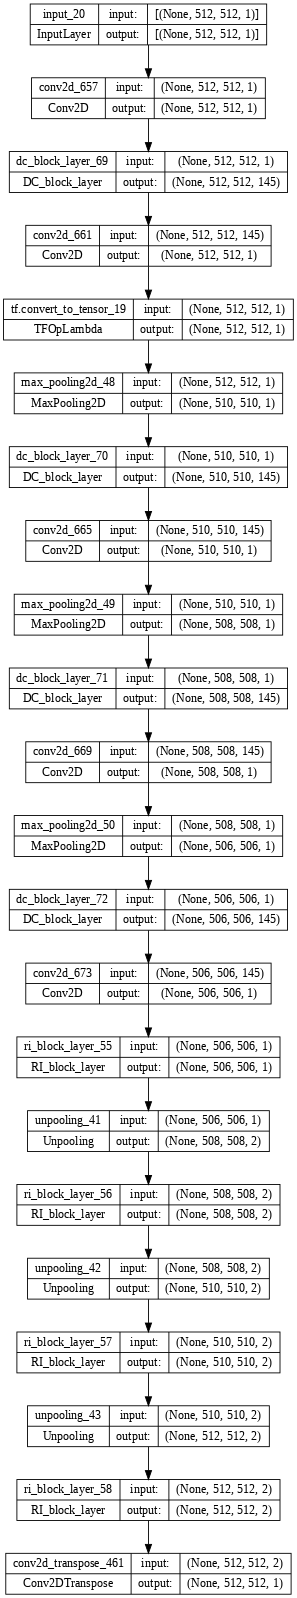

In [96]:
tf.keras.utils.plot_model(mymodel, show_shapes=True, expand_nested=True, dpi=64)

In [97]:
################ Compile ################

mymodel.compile(
    optimizer=Adam(),
    loss = BinaryCrossentropy(),
    metrics=['accuracy']
)

In [49]:
print(train_data)

{'images': array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 2,  2,  3, ...,  3,  3,  3],
        ...,
        [ 4,  4,  4, ...,  5,  5,  4],
        [ 0,  0,  1, ...,  1,  1,  1],
        [ 0,  0,  1, 

In [101]:
train_data_images = train_data['images']
train_data_masks  = train_data['masks']
print(train_data_images.shape,train_data_masks.shape)
# for i in range(len(train_data_images)):
#   if train_data_images.
test_data_images  = test_data['images']
test_data_masks   = test_data['masks']
print(test_data_images[0].shape,test_data_masks[0].shape)

train_dataset = tf.data.Dataset.from_tensor_slices((train_data_images, train_data_masks))
test_dataset = train_dataset = tf.data.Dataset.from_tensor_slices((test_data_images, test_data_masks))

(200, 512, 512) (200, 512, 512)
(512, 512) (512, 512)


In [105]:
################ Train ################

class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

batch_size = 32
num_epochs = 5

train_batches = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_batches = test_dataset.batch(batch_size)

# for x,y in train_batches:
#   print(x.shape,y.shape)

# for x,y in test_batches:
#   print(x.shape,y.shape)



mymodel.fit(train_batches,
            epochs=num_epochs,
            validation_data=test_batches,
            callbacks=[DisplayCallback()])

Epoch 1/5


ResourceExhaustedError: Graph execution error:

Detected at node model_11/dc_block_layer_69/concatenate_2/concat defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-98-0b7fc0d68276>", line 21, in <cell line: 21>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "<ipython-input-42-cc6a8075860a>", line 21, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/merging/base_merge.py", line 196, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/merging/concatenate.py", line 134, in _merge_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 3580, in concatenate

OOM when allocating tensor with shape[32,145,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_11/dc_block_layer_69/concatenate_2/concat}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_100807]

In [ ]:
################ Test ################

loss,accuracy = mymodel.evaluate(test_dataset)